## Imports

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score


%matplotlib inline

## Read Data

In [2]:
data = pd.read_csv('Data_Transformations/data_standard.csv', index_col=False)

In [3]:
data.head()

0         1         2         3         4         5         6  \
0 -0.249434 -0.424900 -0.356934 -0.349079 -0.466786 -0.806490 -0.678661   
1  0.134325 -0.469552 -0.356934 -0.454576  2.605605 -1.221758 -0.678661   
2  0.518084 -0.107668  0.108889 -0.454576 -0.466786  1.269843  2.673451   
3 -1.016953  0.232058  0.546189 -0.454576 -0.368653 -1.014125 -0.399319   
4  0.518084 -0.462063 -0.347294 -0.454576 -0.466786 -1.014125 -0.399319   

          7         8         9        10        11        12        13  \
0 -0.707313 -0.675349 -0.476070 -0.511333 -0.960378 -0.528979 -0.302400   
1 -0.916995  0.573963  0.110074 -0.591796  0.688678  0.818642  0.097500   
2 -0.916995 -0.675349 -0.476070 -0.109020  0.826100 -0.383805 -0.093293   
3 -0.916995 -0.258913 -0.329534 -0.551565  0.826100 -0.598688 -0.228307   
4 -0.916995 -0.675349 -0.476070 -0.551565 -0.905410 -0.364368 -0.257266   

         14       15            y  
0 -0.525551  0.36068    40.900749  
1  0.234227  0.36068  3202.467416  
2 -0.525551  0.36068  2495.148862  
3 -0.525551  0.36068  1666.670542  
4 -0.525551  0.36068   817.714335

## DBScan - Original Standard Scaler

#### Choose eps

In [34]:
from sklearn.neighbors import NearestNeighbors
import plotly.express as px

neighbors = 6

nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(data)

distances, indices = nbrs.kneighbors(data)
distance_desc = sorted(distances[:,neighbors-1], reverse=True)
px.line(x=list(range(1,len(distance_desc)+1)),y= distance_desc )


In [43]:
dbscan = DBSCAN(eps =2, min_samples = 5)
dbscan.fit(data)
labels = dbscan.labels_

In [45]:
labels

array([ 0, -1, -1, ...,  0, -1, -1])

## Silhoutte Score

In [48]:
print('DBSCAN Standard Scaled Silhouette Score: {}'.format\
      (silhouette_score(data, labels, metric='euclidean')))

DBSCAN Standard Scaled Silhouette Score: -0.6381211897430468


In [50]:
adjusted_rand_score(data['y'], labels)

6.390645656565417e-05

## DBScan - PCA

In [51]:
pca = PCA(n_components = 4)  
pca.fit(data)

PCA(n_components=4)

In [52]:
x_pca = pca.transform(data)
x_pca.shape

(8950, 4)

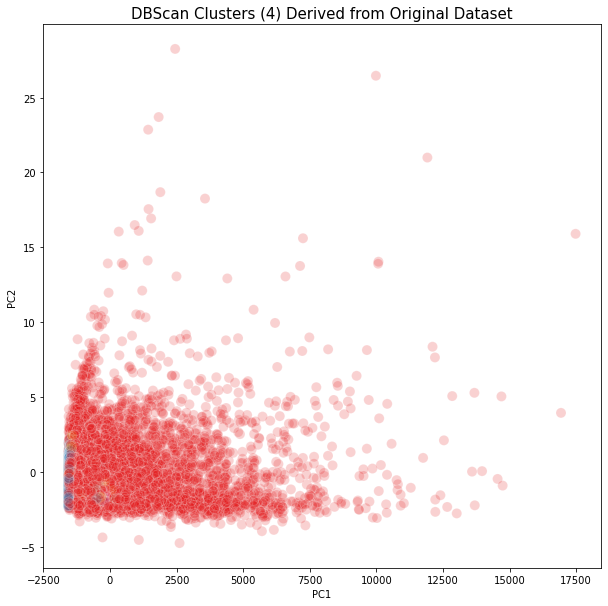

In [55]:
plt.figure(figsize = (10,10))
sns.scatterplot(x_pca[:,0], x_pca[:,1], 
                hue=labels,
                legend=False,
                palette='Set1',
                s=100, alpha=0.2).set_title('DBScan Clusters (4) Derived from Original Dataset',
                fontsize=15)

plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

In [56]:
Scene = dict(xaxis = dict(title  = 'PC1'),\
             yaxis = dict(title  = 'PC2'),zaxis = dict(title  = 'PC3'))

trace = go.Scatter3d(x=x_pca[:,0],\
                     y=x_pca[:,1], z=x_pca[:,2], mode='markers',\
                     marker=dict(color = labels, colorscale='Viridis',\
                     size = 10, line = dict(color = 'gray',width = 5)))

layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 750,width = 750)

data_t = [trace]

fig = go.Figure(data = data_t, layout = layout)

fig.show()

### T-SNE

In [57]:
tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)

In [58]:
tsne_scale_results = tsne.fit_transform(data)

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.000s...
[t-SNE] Computed neighbors for 8950 samples in 2.087s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 4.139822
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.134460
[t-SNE] KL divergence after 5000 iterations: 0.179407


In [59]:
tsne_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])

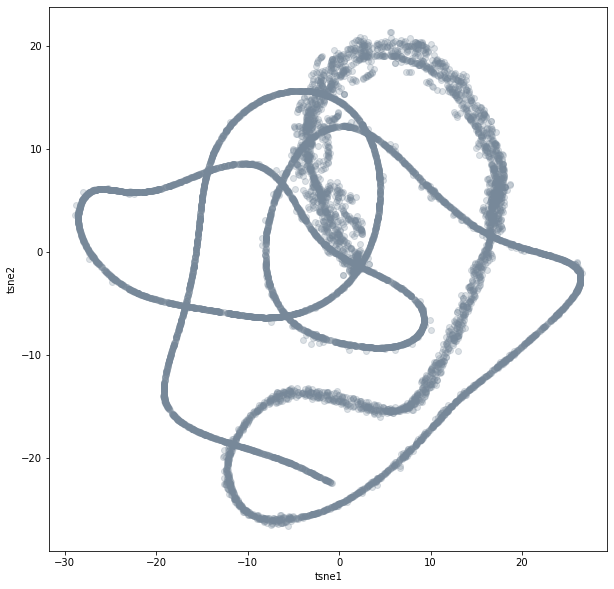

In [60]:
plt.figure(figsize = (10,10))
plt.scatter(tsne_scale.iloc[:,0],tsne_scale.iloc[:,1],alpha=0.25,\
            facecolor='lightslategray')

plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

## T-SNE After DBScan

In [69]:
dbscan_tsne_scale = DBSCAN(eps =2, min_samples = 5)
dbscan_tsne_scale.fit(data)

DBSCAN(eps=2)

In [70]:
dbscan_tsne_scale.labels_

array([ 0, -1, -1, ...,  0, -1, -1])

In [71]:
print('DBscan tSNE Scaled Silhouette Score: {}'.format\
      (silhouette_score(tsne_scale, dbscan_tsne_scale.labels_, metric='euclidean')))

DBscan tSNE Scaled Silhouette Score: -0.6275920867919922


In [72]:
labels_tsne_scale = dbscan_tsne_scale.labels_

In [73]:
clusters_tsne_scale = pd.concat([tsne_scale, pd.DataFrame\
                                 ({'tsne_clusters':labels_tsne_scale})], axis=1)

In [74]:
clusters_tsne_scale.head()

tsne1      tsne2      tsne3  tsne_clusters
0   8.277827  19.405668   4.988271              0
1   2.740284  12.045775 -21.050013             -1
2  -7.467120  -6.371169 -20.872276             -1
3 -19.676008   6.093610  12.261924             -1
4  15.577562   2.068394  16.596392             -1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


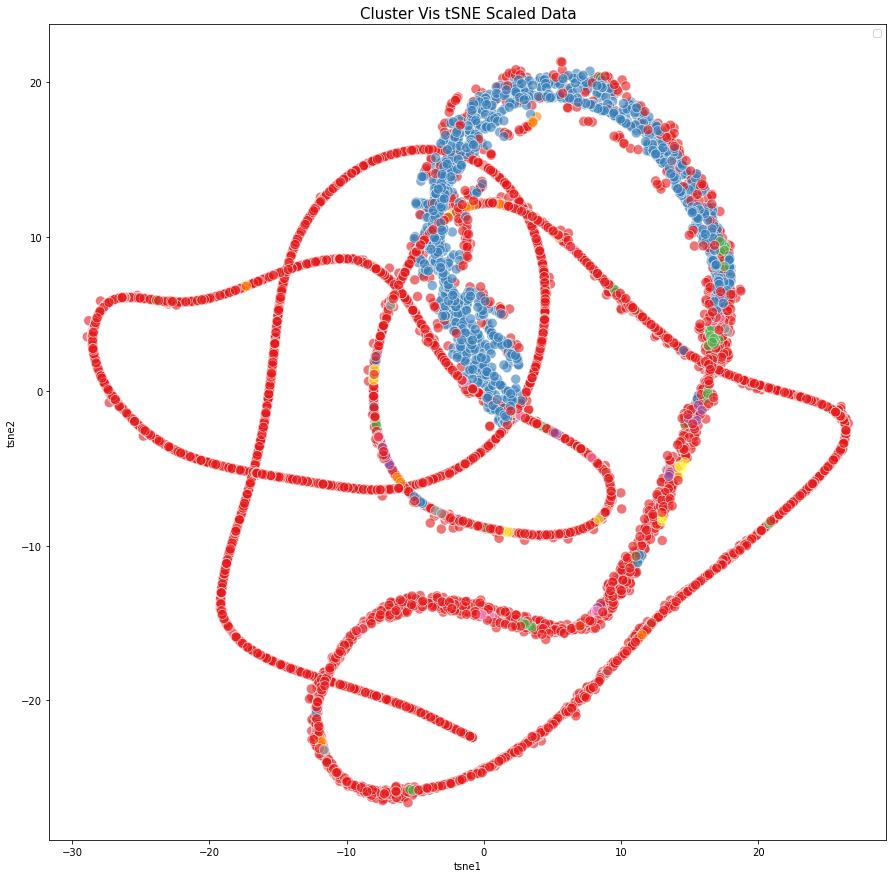

In [79]:
plt.figure(figsize = (15,15))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],
                clusters_tsne_scale.iloc[:,1],
                hue=labels_tsne_scale,
                palette='Set1',
                legend=False,
                s=100,
                alpha=0.6)\
                 .set_title('Cluster Vis tSNE Scaled Data', fontsize=15)

plt.legend()
plt.show()

## EM - Gaussian Mixture  

In [84]:
gm = GaussianMixture(n_components=4, random_state=42)
gm.fit(data)
gm_means = gm.means_

In [85]:
gm.predict(data)

array([0, 3, 2, ..., 0, 3, 1])

## EM - PCA

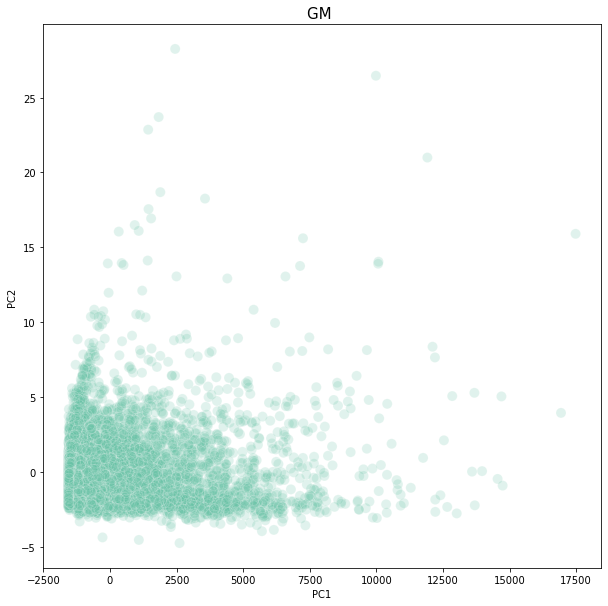

In [97]:
plt.figure(figsize = (10,10))
sns.scatterplot(x_pca[:,0], x_pca[:,1], 
                hue=gm_means[0][1],
                legend=False,
                palette='Set2',
                s=100, alpha=0.2).set_title('GM ',
                fontsize=15)

plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

## Isolated random Forrest

In [99]:
irf = IsolationForest(n_estimators=50,random_state=42,bootstrap=True, n_jobs=-1)
irf.fit(data)

IsolationForest(bootstrap=True, n_estimators=50, n_jobs=-1, random_state=42)

In [100]:
irf.predict(data)

array([ 1,  1,  1, ...,  1,  1, -1])

In [110]:
pred = irf.score_samples(data)

In [111]:
pred

array([-0.38060415, -0.46829182, -0.42958534, ..., -0.48327054,
       -0.47670676, -0.54775509])

## T-SNE After Isolated Forrest

In [123]:
irf_tsne_scale = IsolationForest(n_estimators=50,random_state=42,bootstrap=True, n_jobs=-1)
irf_tsne_scale.fit(data)

IsolationForest(bootstrap=True, n_estimators=50, n_jobs=-1, random_state=42)

In [124]:
irf_tsne_scale_labels = irf_tsne_scale.predict(data)

In [126]:
irf_tsne_scale_labels

array([ 1,  1,  1, ...,  1,  1, -1])

In [127]:
labels_tsne_scale = irf_tsne_scale_labels

In [128]:
clusters_tsne_scale = pd.concat([tsne_scale, pd.DataFrame\
                                 ({'tsne_clusters':labels_tsne_scale})], axis=1)

In [129]:
clusters_tsne_scale.head()

tsne1      tsne2      tsne3  tsne_clusters
0   8.277827  19.405668   4.988271              1
1   2.740284  12.045775 -21.050013              1
2  -7.467120  -6.371169 -20.872276              1
3 -19.676008   6.093610  12.261924              1
4  15.577562   2.068394  16.596392              1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


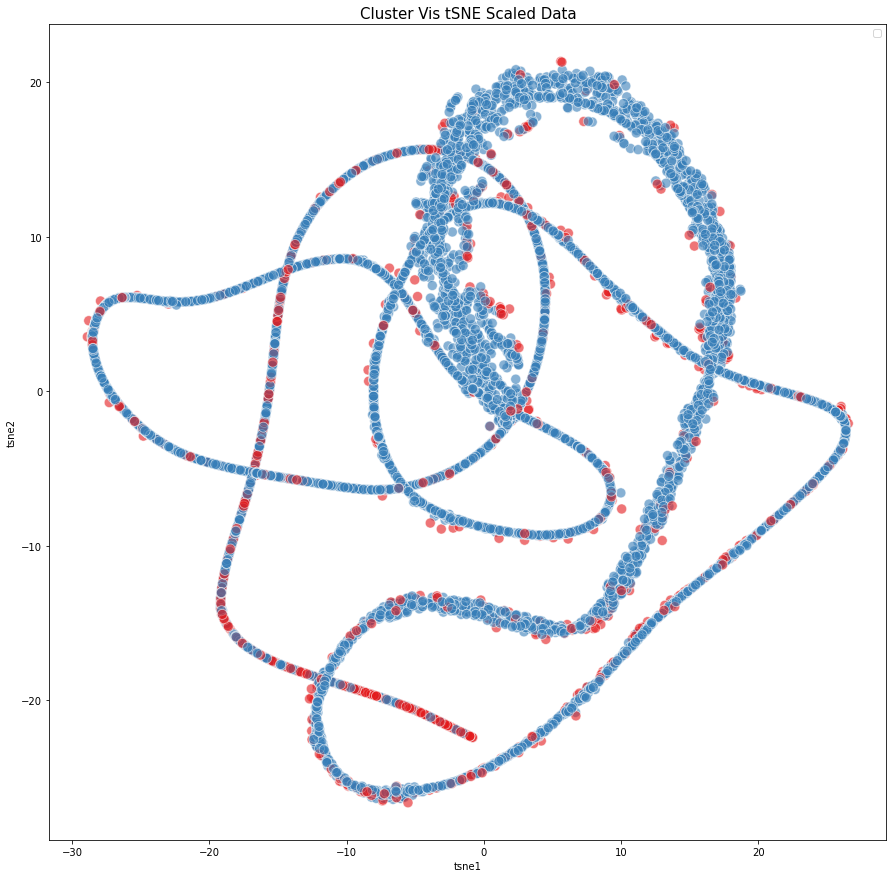

In [130]:
plt.figure(figsize = (15,15))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],
                clusters_tsne_scale.iloc[:,1],
                hue=labels_tsne_scale,
                palette='Set1',
                legend=False,
                s=100,
                alpha=0.6)\
                 .set_title('Cluster Vis tSNE Scaled Data', fontsize=15)

plt.legend()
plt.show()